Linearity Assumption

In [4]:
import pandas as pd


df = pd.read_csv('animal_df.csv')
df.head(10)

,animal_type,has_name,outcome_group,age_days_outcome,age_group_intake,los_at_shelter,month_of_outcome,is_fixed,breed_type,color_group,intake_condition_group
0,Dog,0,Positive,733,Young Adult,1,February,0,Pure,Brown,Injured
1,Dog,1,Neutral,916,Young Adult,1,February,0,Mix,Black,Healthy/Normal
2,Cat,1,Positive,176,Puppy/Kitten,2,February,1,Pure,Red,Healthy/Normal
3,Other,0,Negative,732,Young Adult,1,February,0,Pure,Brown,Healthy/Normal
4,Cat,1,Positive,367,Young Adult,1,February,1,Pure,Brown,Healthy/Normal
5,Dog,1,Positive,746,Young Adult,1,February,1,Pure,Brown,Healthy/Normal
6,Dog,1,Positive,746,Young Adult,1,February,1,Pure,White,Healthy/Normal
7,Dog,1,Positive,1462,Adult,1,February,1,Mix,Black,Healthy/Normal
8,Dog,1,Positive,137,Puppy/Kitten,1,February,1,Mix,Gold,Healthy/Normal
9,Dog,0,Neutral,1465,Adult,3,February,0,Mix,Brown,Healthy/Normal


# Causal Inference DoWhy

In [6]:
# !pip install dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.1 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.12
    Uninstalling Cython-3.0.12:
      Successfully uninstalled Cython-3.0.12


Hypothesis: The older the animal the longer its stay in the shelter will be

In [7]:
import dowhy
from dowhy import CausalModel
import networkx as nx
import matplotlib.pyplot as plt

model = CausalModel(
    data=df,
    treatment='age_days_outcome',
    outcome='los_at_shelter',
    common_causes=[
        'animal_type',
        'breed_type',
        'intake_condition_group'
    ]
)

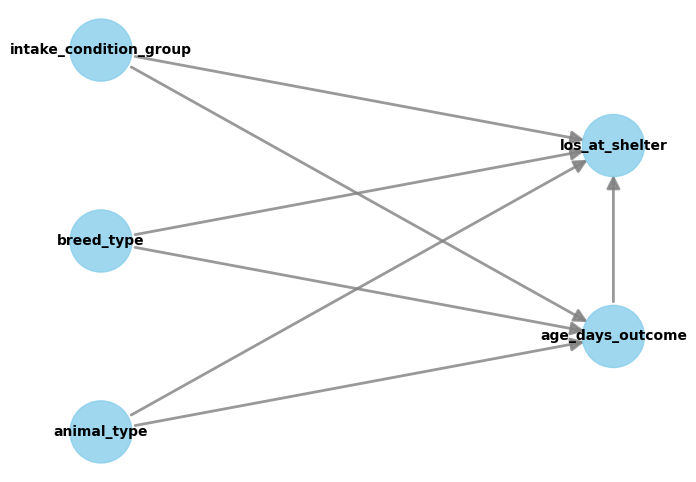

In [8]:
# Visualize the causal graph
model.view_model()

In [9]:
# Identify the causal effect
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                          
───────────────────(E[los_at_shelter|animal_type,breed_type,intake_condition_group])
d[age_days_outcome]                                                                 
Estimand assumption 1, Unconfoundedness: If U→{age_days_outcome} and U→los_at_shelter then P(los_at_shelter|age_days_outcome,animal_type,breed_type,intake_condition_group,U) = P(los_at_shelter|age_days_outcome,animal_type,breed_type,intake_condition_group)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [14]:
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)
print("Estimated Causal Effect:", causal_estimate)

Estimated Causal Effect: *** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                          
───────────────────(E[los_at_shelter|animal_type,breed_type,intake_condition_group])
d[age_days_outcome]                                                                 
Estimand assumption 1, Unconfoundedness: If U→{age_days_outcome} and U→los_at_shelter then P(los_at_shelter|age_days_outcome,animal_type,breed_type,intake_condition_group,U) = P(los_at_shelter|age_days_outcome,animal_type,breed_type,intake_condition_group)

## Realized estimand
b: los_at_shelter~age_days_outcome+animal_type+breed_type+intake_condition_group
Target units: ate

## Estimate
Mean value: 0.007434220883208553



/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [15]:
# Refute the estimate to test robustness
refutation = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="placebo_treatment_refuter"
)
print(refutation)

/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Refute: Use a Placebo Treatment
Estimated effect:0.007434220883208553
New effect:1.1557913394675268e-05
p value:0.8600000000000001



/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [16]:
refutation_random = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="random_common_cause"
)
print(refutation_random)


/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Refute: Add a random common cause
Estimated effect:0.007434220883208553
New effect:0.0074341930360093044
p value:0.96



/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [17]:
refutation_subset = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="data_subset_refuter",
    subset_fraction=0.9
)
print(refutation_subset)

/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Refute: Use a subset of data
Estimated effect:0.007434220883208553
New effect:0.007416310866840057
p value:0.92



/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


## Conclusion

We assume that there are no unobserved confounders that affect both age and length of stay

The estimated effect of a one day increase in age is that it would increase length of stay in the shelter by 0.0074

**Placebo**

*   With the Placebo test the treatment variable (age) is replaced with a random placebo variable. And Since the new estimated effect is closer to 0 and a high p-value suggests that the placebo variable does not influence length of stay in the shelter

**Random Common Cause**

*   This test adds a fake confounder and checks if the estimated causal effect changes. Since the new effect is similar to the original estimate, it suggests that unobserved confounders are not a major issue. Additionally, the high p-value suggests that the added random confounder had no significant impact on the causal effect. Which boosts our confidence in our model and hypothesis.

**Data Subset Refutation**


*   This test runs the causal estimation on a random 90% subset of the data, to check for stability of the estimated effect. Since our estimate barely changed (0.00001 change), we can assume that our model generalizes well, and that the results are not dependant on any portion of data. Furthermore, the high p-value boosts our confidence further that the estimated effect is stable.



